stations: AP3N
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
alan
Number of waveforms involved: 12


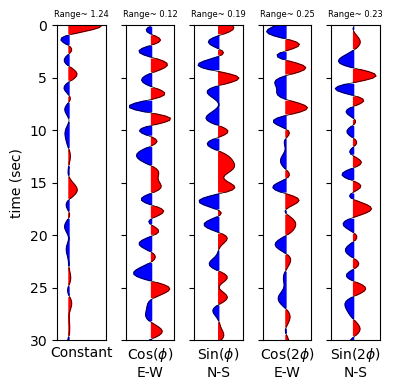

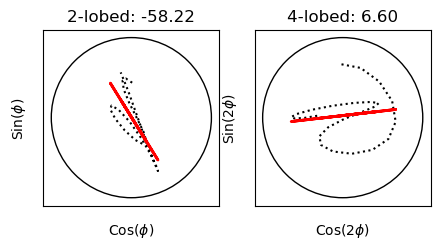

In [1]:
import pandas as pd
from codes_RF.HDPM import info_extract, harmonic_decomp, particlemotion

stations = ["AP3N","ARVN","AXF","BLKN","BULN","CNF","CRLN","CTSN","DORN","EUNU","FCC","GIFN","IBFB","ILON","INUQ","JOSN","KUGN","LAIN","MANN","MARN","MCF","MCMN","NOTN","NUNN","POIN","QILN","RES","SAKN","SEDN","SHMN","SHWN","SMLN","SRLN","STLN","TQF","WAGN","YRTN"]
stations = stations[0:1]
for station in stations:
    station = station.upper()
    wave_df = pd.read_csv("DATA/waveforms_list.csv")
    wave_df = wave_df[(wave_df["sta_code"] == station) & (wave_df["rf_quality"] == 1)]
    wave_list = [f"DATA/RF/{i}.pkl" for i in wave_df["file_name"]]
    print(f"stations: {station}")


    wave, G = info_extract(wave_list)
    m = harmonic_decomp(wave, G)
    address = "Results/HARMINIC_DECOMP/ParticleMotion" # save folder
    particlemotion(m, type="2-lobed", xmin=0, xmax=5, save_folder=address, station=station)